# Searching for Correlation between Recipe Ratings and Fat, Protein, & Sodium.

#### data source:
[Epicurious - Recipes with Rating and Nutrition](https://www.kaggle.com/datasets/hugodarwood/epirecipes)

In [217]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
# load in data with the columns we want. Other columns are ingredients tracked by 1 or 0 values.
df = pd.read_csv("recipedata/epi_r.csv", usecols=['title', 'rating', 'calories', 'protein', 'fat', 'sodium'])
print(df)

                                             title  rating  calories  protein  \
0                  Lentil, Apple, and Turkey Wrap     2.50    426.00    30.00   
1      Boudin Blanc Terrine with Red Onion Confit     4.38    403.00    18.00   
2                    Potato and Fennel Soup Hodge     3.75    165.00     6.00   
3                 Mahi-Mahi in Tomato Olive Sauce     5.00       NaN      NaN   
4                        Spinach Noodle Casserole     3.12    547.00    20.00   
...                                            ...     ...       ...      ...   
20047                              Parmesan Puffs     3.12     28.00     2.00   
20048              Artichoke and Parmesan Risotto     4.38    671.00    22.00   
20049                       Turkey Cream Puff Pie     4.38    563.00    31.00   
20050     Snapper on Angel Hair with Citrus Cream     4.38    631.00    45.00   
20051  Baked Ham with Marmalade-Horseradish Glaze     4.38    560.00    73.00   

        fat  sodium  
0    

In [219]:
# find whether columns contain null values
print(df.isnull().sum())

title          0
rating         0
calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64


In [220]:
# We want to remove NaN and 0 values as we only want to check complete rows to get more accurate data.
cleaned_df = df.replace(0, np.nan).dropna()
print(cleaned_df)
print(cleaned_df.isnull().sum())

                                             title  rating  calories  protein  \
0                  Lentil, Apple, and Turkey Wrap     2.50    426.00    30.00   
1      Boudin Blanc Terrine with Red Onion Confit     4.38    403.00    18.00   
2                    Potato and Fennel Soup Hodge     3.75    165.00     6.00   
4                        Spinach Noodle Casserole     3.12    547.00    20.00   
5                                   The Best Blts     4.38    948.00    19.00   
...                                            ...     ...       ...      ...   
20047                              Parmesan Puffs     3.12     28.00     2.00   
20048              Artichoke and Parmesan Risotto     4.38    671.00    22.00   
20049                       Turkey Cream Puff Pie     4.38    563.00    31.00   
20050     Snapper on Angel Hair with Citrus Cream     4.38    631.00    45.00   
20051  Baked Ham with Marmalade-Horseradish Glaze     4.38    560.00    73.00   

        fat  sodium  
0    

In [221]:
# now that the data is clean, let's perform summary statistics
print(cleaned_df.describe())

        rating    calories   protein        fat      sodium
count 13483.00    13483.00  13483.00   13483.00    13483.00
mean      4.09     7424.30    116.90     406.32     7284.04
std       0.64   390322.95   4168.83   22192.00   362328.80
min       1.25       13.00      1.00       1.00        1.00
25%       3.75      228.00      4.00      10.00      123.00
50%       4.38      376.00     10.00      20.00      346.00
75%       4.38      630.50     31.00      36.00      778.00
max       5.00 30111218.00 236489.00 1722763.00 27675110.00


In [222]:
# we can see that 3 of the columns have scientific notation. Let's clean it up for readability.
# Force decimal notation (no scientific notation)
pd.set_option('display.float_format', '{:.2f}'.format)  # 2 decimal places
print(cleaned_df.describe())

        rating    calories   protein        fat      sodium
count 13483.00    13483.00  13483.00   13483.00    13483.00
mean      4.09     7424.30    116.90     406.32     7284.04
std       0.64   390322.95   4168.83   22192.00   362328.80
min       1.25       13.00      1.00       1.00        1.00
25%       3.75      228.00      4.00      10.00      123.00
50%       4.38      376.00     10.00      20.00      346.00
75%       4.38      630.50     31.00      36.00      778.00
max       5.00 30111218.00 236489.00 1722763.00 27675110.00


In [223]:
# Some of the data seems to be skewed. Likely some of the values in fat, sodium, and protein are in grams and some in milligrams.
# Perhaps the calorie column can help us understand more
calorie_mean = cleaned_df['calories'].mean()
calorie_median = cleaned_df['calories'].median()
calorie_mode = cleaned_df['calories'].mode().values[0]
print(f"Mean: {calorie_mean}")
print(f"Median: {calorie_median}")
print(f"Mode: {calorie_mode}")

Mean: 7424.295260698657
Median: 376.0
Mode: 234.0


In [224]:
# based on how high the median is, we can assume we have right-skewed data
Q1 = cleaned_df['calories'].quantile(0.25)  # 25th percentile
Q3 = cleaned_df['calories'].quantile(0.75)  # 75th percentile
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")

# Define outlier thresholds (values above this are extreme)
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = cleaned_df[cleaned_df['calories'] > upper_bound]
print(f"Number of extreme high values: {len(outliers)}")
print(f"Threshold: > {upper_bound:.2f} calories")

Q1: 228.0
Q3: 630.5
Number of extreme high values: 858
Threshold: > 1234.25 calories


In [225]:
# Keep rows where 'calories' is below a reasonable threshold, the upper bound.
# Looking at the new averages, our mean, median, and mode should be much closer
capped_cal_df = cleaned_df[cleaned_df['calories'] <= upper_bound]

calorie_mean = capped_cal_df['calories'].mean()
calorie_median = capped_cal_df['calories'].median()
calorie_mode = capped_cal_df['calories'].mode().values[0]
print(f"New Mean: {calorie_mean}")
print(f"New Median: {calorie_median}")
print(f"New Mode: {calorie_mode}")

New Mean: 416.10653465346536
New Median: 352.0
New Mode: 234.0


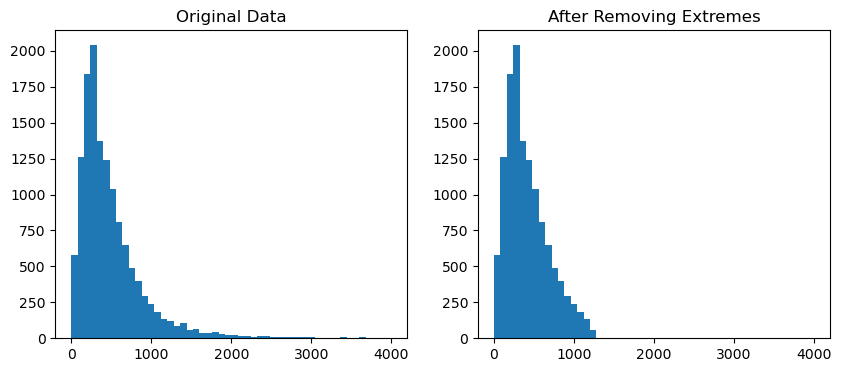

In [226]:
# Let's visualize the data to see the impact made
# Before capping calories
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(cleaned_df['calories'], bins=50, range=(0, 4000))
plt.title("Original Data")

# After capping calories
plt.subplot(1, 2, 2)
plt.hist(capped_cal_df['calories'], bins=50, range=(0, 4000))
plt.title("After Removing Extremes")
plt.show()

## Correlation between Rating and Fat




In [228]:
# Looking at the Fat averages, min, max
fat_mean = capped_cal_df['fat'].mean()
fat_median = capped_cal_df['fat'].median()
fat_mode = capped_cal_df['fat'].mode().values[0]
fat_min = capped_cal_df['fat'].min()
fat_max = capped_cal_df['fat'].max()
fat_std = capped_cal_df['fat'].std()
print(f"Fat Mean: {fat_mean}")
print(f"Fat Median: {fat_median}")
print(f"Fat Mode: {fat_mode}")
print(f"Fat Min: {fat_min}")
print(f"Fat Max: {fat_max}")
print(f"Fat Standard Deviation: {fat_std}")

Fat Mean: 23.417425742574256
Fat Median: 18.0
Fat Mode: 1.0
Fat Min: 1.0
Fat Max: 135.0
Fat Standard Deviation: 18.777848280707833


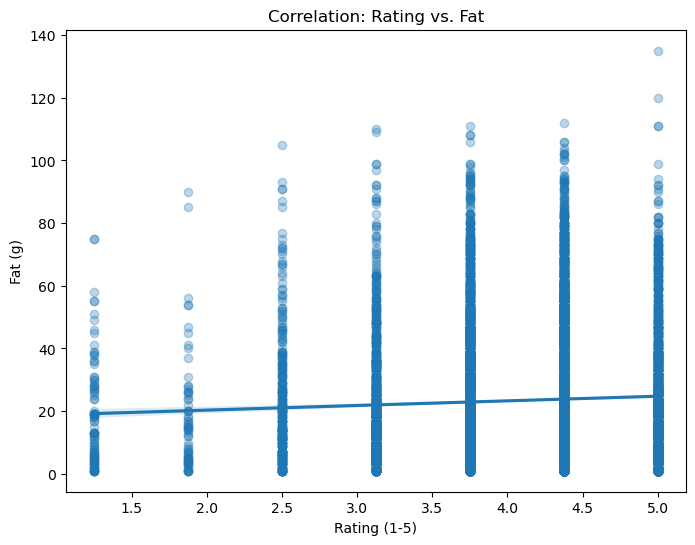

In [229]:
# Scatter plot with regression line to see correlation between rating and fat
plt.figure(figsize=(8, 6))
sns.regplot(x='rating', y='fat', data=capped_cal_df, scatter_kws={'alpha':0.3})
plt.title("Correlation: Rating vs. Fat")
plt.ylabel("Fat (g)")
plt.xlabel("Rating (1-5)")
plt.show()

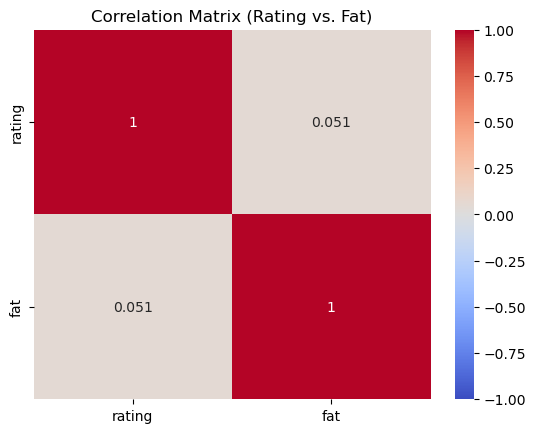

In [230]:
# Calculate Pearson correlation
corr2 = capped_cal_df[['rating', 'fat']].corr()

# Plot heatmap
sns.heatmap(corr2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Rating vs. Fat)")
plt.show()

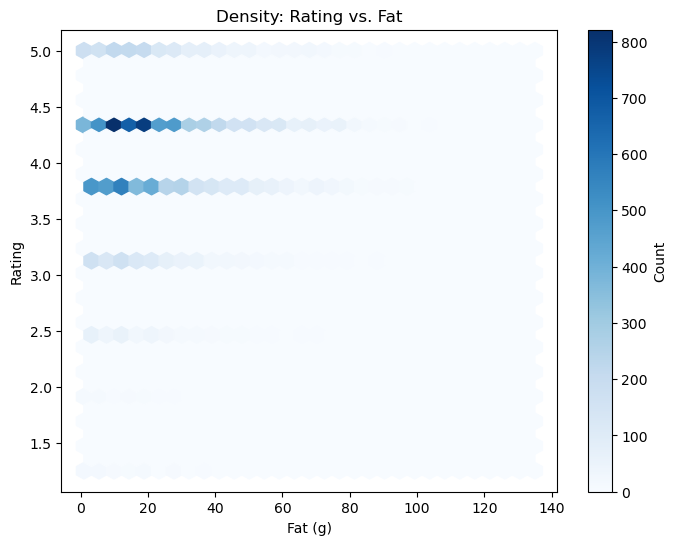

In [231]:
# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(x=capped_cal_df['fat'], y=capped_cal_df['rating'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title("Density: Rating vs. Fat")
plt.xlabel("Fat (g)")
plt.ylabel("Rating")
plt.show()

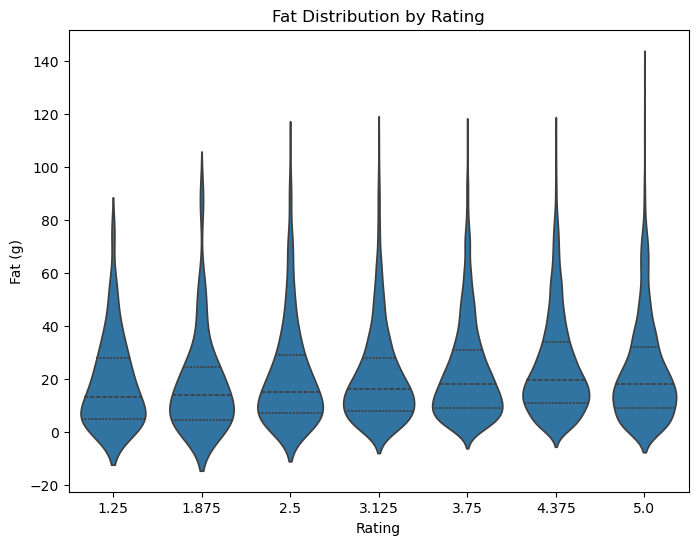

In [232]:
# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='rating', y='fat', data=capped_cal_df, inner='quartile')
plt.title("Fat Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Fat (g)")
plt.show()

### Findings

- Based on the Pearson Correlation of .051 we can deduce that there is no correlation between fat content and the rating of a recipe.
- Further, we can assess that this may be due to the high density of recipes that share the same fat content range as well as the density of recipes with the same rating.

## Correlation between Rating and Protein

In [235]:
# Looking at the Protein averages
protein_mean = capped_cal_df['protein'].mean()
protein_median = capped_cal_df['protein'].median()
protein_mode = capped_cal_df['protein'].mode().values[0]
protein_min = capped_cal_df['protein'].min()
protein_max = capped_cal_df['protein'].max()
protein_std = capped_cal_df['protein'].std()
print(f"Protein Mean: {protein_mean}")
print(f"Protein Median: {protein_median}")
print(f"Protein Mode: {protein_mode}")
print(f"Protein Min: {protein_min}")
print(f"Protein Max: {protein_max}")
print(f"Protein Standard Deviation: {protein_std}")

Protein Mean: 17.974574257425743
Protein Median: 9.0
Protein Mode: 2.0
Protein Min: 1.0
Protein Max: 192.0
Protein Standard Deviation: 20.662300810247853


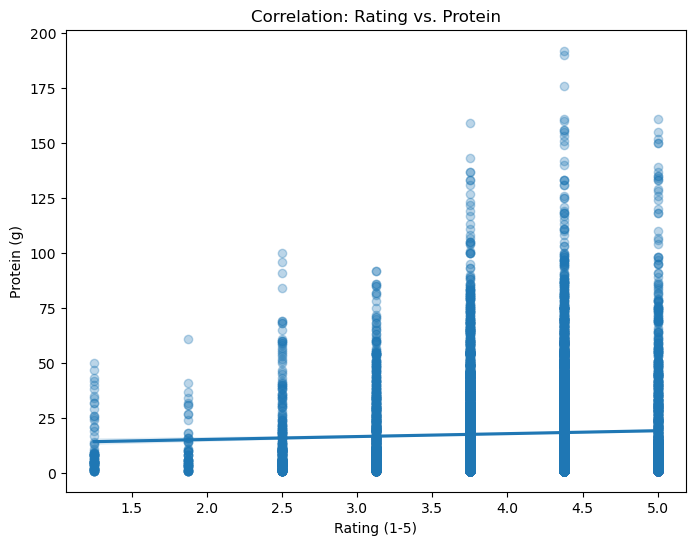

In [236]:
# Scatter plot with regression line to see correlation between rating and protein
plt.figure(figsize=(8, 6))
sns.regplot(x='rating', y='protein', data=capped_cal_df, scatter_kws={'alpha':0.3})
plt.title("Correlation: Rating vs. Protein")
plt.ylabel("Protein (g)")
plt.xlabel("Rating (1-5)")
plt.show()

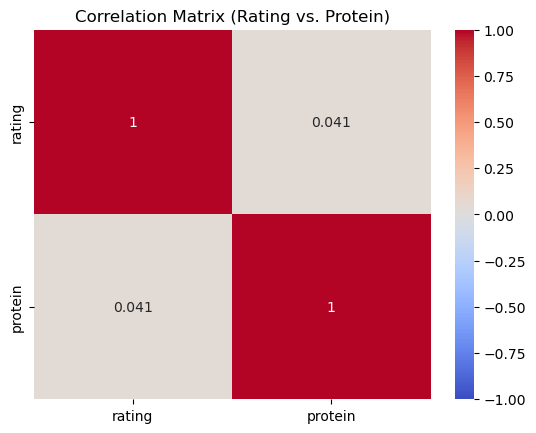

In [237]:
# Calculate Pearson correlation
corr2 = capped_cal_df[['rating', 'protein']].corr()

# Plot heatmap
sns.heatmap(corr2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Rating vs. Protein)")
plt.show()

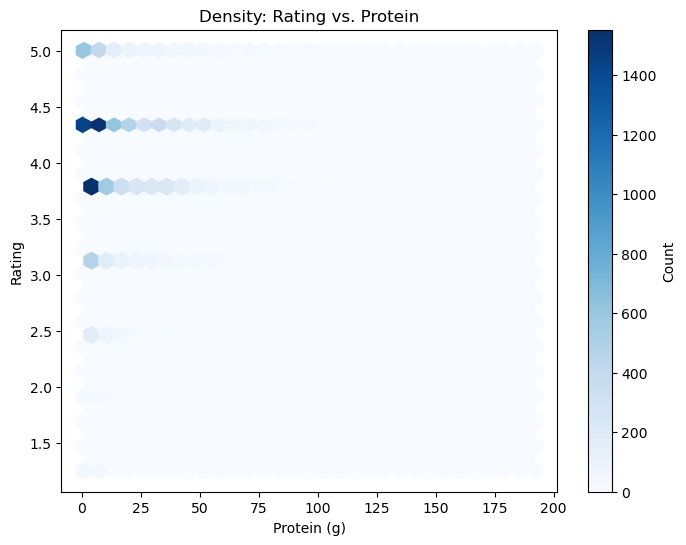

In [238]:
# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(x=capped_cal_df['protein'], y=capped_cal_df['rating'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title("Density: Rating vs. Protein")
plt.xlabel("Protein (g)")
plt.ylabel("Rating")
plt.show()

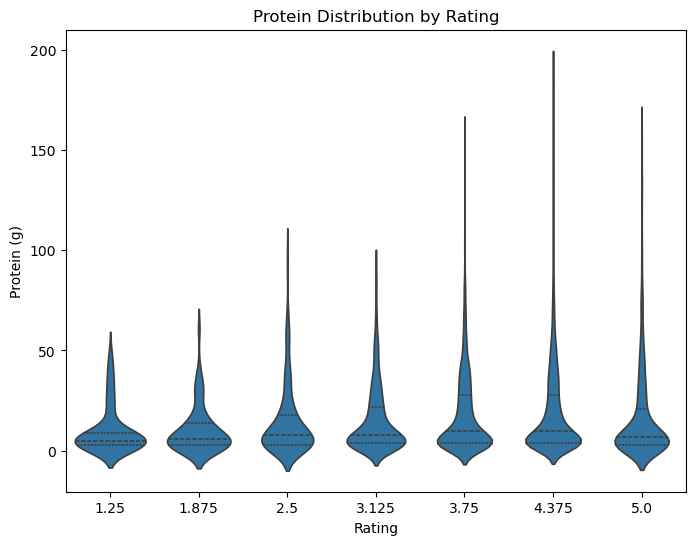

In [239]:
# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='rating', y='protein', data=capped_cal_df, inner='quartile')
plt.title("Protein Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Protein (g)")
plt.show()

### Findings

- Based on the Pearson Correlation of .041 we can deduce that there is no correlation between protein content and the rating of a recipe.
- Further, we can assess that this may be due to the high density of recipes that share the same protein content range as well as the density of recipes with the same rating.

## Correlation between Rating and Sodium

In [242]:
# Looking at the Sodium averages
sodium_mean = capped_cal_df['sodium'].mean()
sodium_median = capped_cal_df['sodium'].median()
sodium_mode = capped_cal_df['sodium'].mode().values[0]
sodium_min = capped_cal_df['sodium'].min()
sodium_max = capped_cal_df['sodium'].max()
sodium_std = capped_cal_df['sodium'].std()
print(f"Sodium Mean: {sodium_mean}")
print(f"Sodium Median: {sodium_median}")
print(f"Sodium Mode: {sodium_mode}")
print(f"Sodium Min: {sodium_min}")
print(f"Sodium Max: {sodium_max}")
print(f"Sodium Standard Deviation: {sodium_std}")

Sodium Mean: 622.3846336633663
Sodium Median: 317.0
Sodium Mode: 4.0
Sodium Min: 1.0
Sodium Max: 132220.0
Sodium Standard Deviation: 2668.763721766234


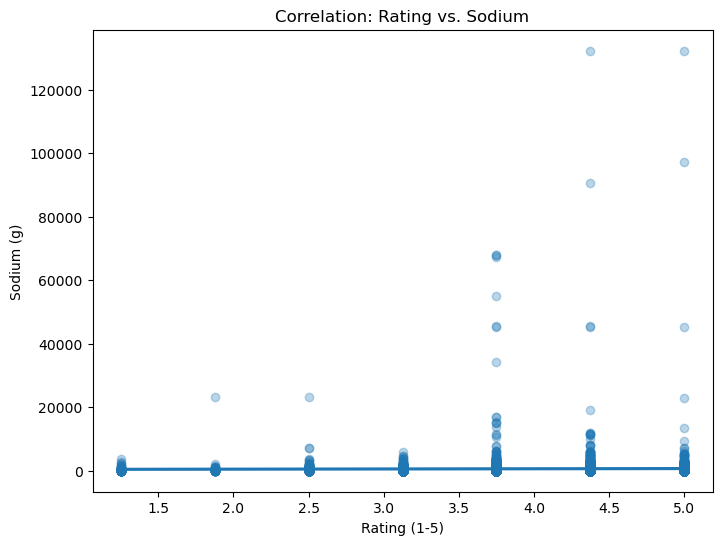

In [243]:
# Scatter plot with regression line to see correlation between rating and sodium
plt.figure(figsize=(8, 6))
sns.regplot(x='rating', y='sodium', data=capped_cal_df, scatter_kws={'alpha':0.3})
plt.title("Correlation: Rating vs. Sodium")
plt.ylabel("Sodium (g)")
plt.xlabel("Rating (1-5)")
plt.show()

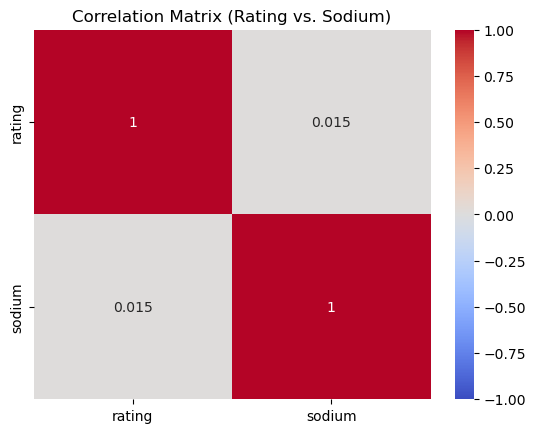

In [244]:
# Calculate Pearson correlation
corr2 = capped_cal_df[['rating', 'sodium']].corr()

# Plot heatmap
sns.heatmap(corr2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Rating vs. Sodium)")
plt.show()

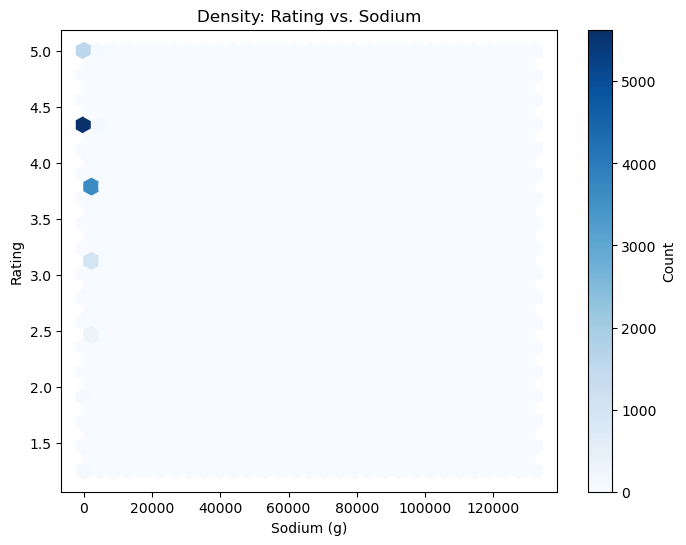

In [245]:
# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(x=capped_cal_df['sodium'], y=capped_cal_df['rating'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title("Density: Rating vs. Sodium")
plt.xlabel("Sodium (g)")
plt.ylabel("Rating")
plt.show()

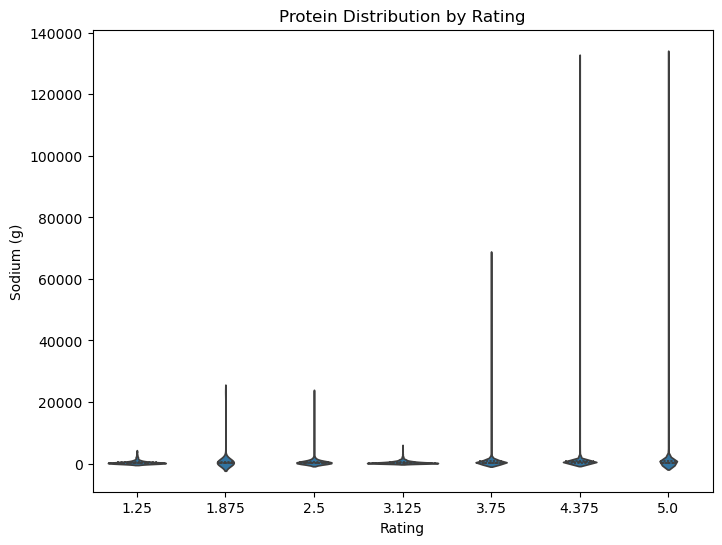

In [246]:
# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='rating', y='sodium', data=capped_cal_df, inner='quartile')
plt.title("Protein Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Sodium (g)")
plt.show()

### Findings

- Based on the Pearson Correlation of .015 we can deduce that there is no correlation at all between sodium content and the rating of a recipe.
- Further, we can assess that the sodium data column may be unreliable and a mix of grams or milligrams based on the high STD and max value.

## Conclusions

Ratings tell us absolutely nothing in regards to how much fat, protein, or sodium may be in the nutrition of the recipe.
We could also conclude that based on the high density of ratings near the averages that rating itself will tell us nothing about the recipe.



In [249]:
# Looking at the Protein averages
rating_mean = capped_cal_df['rating'].mean()
rating_median = capped_cal_df['rating'].median()
rating_mode = capped_cal_df['rating'].mode().values[0]
rating_min = capped_cal_df['rating'].min()
rating_max = capped_cal_df['rating'].max()
rating_std = capped_cal_df['rating'].std()
print(f"Rating Mean: {rating_mean}")
print(f"Rating Median: {rating_median}")
print(f"Rating Mode: {rating_mode}")
print(f"Rating Min: {rating_min}")
print(f"Rating Max: {rating_max}")
print(f"Rating Standard Deviation: {rating_std}")

Rating Mean: 4.083366336633663
Rating Median: 4.375
Rating Mode: 4.375
Rating Min: 1.25
Rating Max: 5.0
Rating Standard Deviation: 0.6427247860179615


# Final Conclusion - Ratings for recipes on the internet are meaningless